# Fermionic permutation puzzle

In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.cm as cm


### States

In [3]:
zero  = np.array([[1], [0], [0], [0], [0], [0]],dtype=complex)
one   = np.array([[0], [1], [0], [0], [0], [0]],dtype=complex)
two   = np.array([[0], [0], [1], [0], [0], [0]],dtype=complex)
three = np.array([[0], [0], [0], [1], [0], [0]],dtype=complex)
four  = np.array([[0], [0], [0], [0], [1], [0]],dtype=complex)
five  = np.array([[0], [0], [0], [0], [0], [1]],dtype=complex)

### Permutations

In [4]:
SN = - zero@zero.T - one@one.T + five@two.T \
     +four@three.T+three@four.T+ two@five.T

SS = - zero@zero.T - one@one.T + five@three.T \
     +four@two.T+two@four.T+ three@five.T

SE = - two@two.T - three@three.T + five@one.T \
     +four@zero.T+zero@four.T+ one@five.T

SW = - two@two.T - three@three.T + five@zero.T \
     +four@one.T+one@four.T+ zero@five.T

Id = zero@zero.T + one@one.T + two@two.T + \
     three@three.T + four@four.T + five@five.T

In [5]:
Perms = [SN,SS,SE,SW]
np.real(SW)

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
SQRT_SWAP = [(Id + 1j*P)/np.sqrt(2) for P in Perms]

In [7]:
SQRT_SWAP[0]@two

array([[0.        +0.j        ],
       [0.        +0.j        ],
       [0.70710678+0.j        ],
       [0.        +0.j        ],
       [0.        +0.j        ],
       [0.        +0.70710678j]])

In [8]:
SQRT_SWAP[3]@SQRT_SWAP[1]@SQRT_SWAP[0]@SQRT_SWAP[2]@zero

array([[ 0.25-0.5j ],
       [-0.25+0.j  ],
       [-0.25+0.25j],
       [-0.25+0.25j],
       [ 0.  +0.25j],
       [ 0.5 -0.25j]])

In [9]:

generators = []

for op in SQRT_SWAP:  # To test use Perms instead of SQRT_SWAP
    generators.append(op)
    generators.append(np.linalg.inv(op))
len(generators)

8

### Find group elements

Lets build the set step-by-step by applying the generators in their inverses to all of the elements we added in the previous step. We will start with the Idenitty as the only element of the set.

We will keep going until we dont add anyting new.

In [154]:
group_elems = [Id]

def add_unique(new_elems, group_elems):
    added = False
    for new_elem in new_elems:
        flag = False
        for group_elem in group_elems:
            if test_close(new_elem,group_elem):
                flag = True
                break
        if not(flag): 
            group_elems.append(new_elem)
            #group_elems.append(np.linalg.inv(new_elem))
            added = True
    return added

Flag = True
while(Flag):
    current_elems = np.copy(group_elems)
    Flag = False
    for g in generators:
        new_elems = [g@e for e in current_elems]
        added = add_unique(new_elems,group_elems)
        if added: 
            Flag = True
    

In [155]:
print(len(group_elems))

24


In [107]:
def test_close(A,B):
    dim = len(B[:,0])
    return np.allclose(np.abs(np.trace(np.conj(A.T)@B)),dim)

## Trying to enumerate states instead

In [10]:
import math
def test_close_states_quick(A,B):
    return np.isclose(np.abs(np.vdot(A,B)),1)
def test_close_states_swift(A,B):
    return math.isclose(np.abs(np.vdot(A,B)),1)
def test_close_states(A,B):
    return np.allclose(np.abs(np.trace(np.conj(A.T)@B)),1) 

## comparing performance of comparison methods

In [175]:
import time
start_time = time.perf_counter()

for i in range(100000):
    test_close_states(zero,zero)
    test_close_states(zero,one)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

The execution time is: 8.542611737999323


In [176]:
start_time = time.perf_counter()

for i in range(100000):
    test_close_states_quick(zero,zero)
    test_close_states_quick(zero),one)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

The execution time is: 9.032579605000137


In [177]:
start_time = time.perf_counter()

for i in range(100000):
    test_close_states_swift(zero,zero)
    test_close_states_swift(zero,one)

end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

The execution time is: 0.5390001020005002


In [370]:
def add_unique(new_elems, group_elems):
    num_added = 0
    for new_elem in new_elems:
        flag = False
        for group_elem in group_elems:
            if test_close_states_swift(new_elem,group_elem):
                flag = True
                break
        if not(flag): 
            group_elems.append(new_elem)
            num_added += 1
    return num_added

In [371]:
group_elems = [zero]
start_time = time.perf_counter()
counter = 0 # Tracks the number of times we have been through the loop
index = 0 
next_index = 1
while(counter<6):
    total_added = 0
    current_elems = np.copy(group_elems[index:]) # so we dont need to generate states we have  definetly already generated before
    index = next_index
    for g in generators:
        new_elems = [g@e for e in current_elems]
        num_added = add_unique(new_elems,group_elems)
        total_added += num_added
    if total_added == 0: 
        break
    next_index += total_added   
    print('There are',total_added, 'depth',counter+1, 'boards and', len(group_elems), 'total boards up to depth', counter+1)
    counter +=1
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

There are 4 depth 1 boards and 5 total boards up to depth 1
There are 22 depth 2 boards and 27 total boards up to depth 2
There are 100 depth 3 boards and 127 total boards up to depth 3
There are 495 depth 4 boards and 622 total boards up to depth 4
There are 2120 depth 5 boards and 2742 total boards up to depth 5
There are 10068 depth 6 boards and 12810 total boards up to depth 6
The execution time is: 252.12471771900164


## Speed up By only comparing similar states
    The high level idea is that we really dont need to compare each state we generate to every other state we have generated, we only need to compare it to other states that look similar. So if we can characterizes the states as we find them into some categories such that we only need to do comparisons within a catagory to know if that state exists in the group already. 
    
    Right now we are characterizing by the number of nonzero elements. We know that a state of the form $a|n\rangle + b |m\rangle$ for $n,m\in(0,5)$ will never be the same as a state of the form $a|n\rangle +b|m\rangle +c|l\rangle$ so we dont need to compare them. We accomplish this by putting the group elements into a dictionary, essentially a multidimensional array for this purpose. The problem is that this characteristic function (the number of nonzero elements) is two fold. 1) there are only. catagories so we still need to do a lot of comparisons, at best we reduce the number of comparisons for each state by a factor of 6. 2) the 6 catagories are not evenly occupied. For example we know there are only 6 states with 1 nonzero entry, but it seems like there are many thousand with 6 entries. Now we do even worse than a factor of 6 on average. 
    
    What do we want out of a characteristic function. We want to make sure that there is no way that two states that differ by only a global phase (or a small floating point error ie 0 vs 1.8E-19) are put in different catagories. Given this we would like there to be as few states in each catagory as possible, so hopefully this means lots of catagories and an even split between catagories. 
    
    Idea: By eye I can tell that a state like $\frac{1}{\sqrt{3}} \left(|0\rangle \pm|1\rangle\pm|2\rangle\right)$ is does not need to be compared to a state like $ \frac{1}{2}|0\rangle \pm\frac{1}{\sqrt{2}}|1\rangle\pm\frac{1}{2}|2\rangle\right)$, so Maybe if we can write code to tell the difference between these classes then it could be a good discriminator. 

In [426]:
def test_close_states_swift(A,B):
    return math.isclose(np.abs(np.vdot(A,B)),1)

def num_nonzero(state):
    num = 0
    for coeff in state:
        if not math.isclose(np.abs(coeff),0):
            num += 1
    return num
def add_unique_dict(new_elems, group,indecies):
    num_added = 0
    for new_elem in new_elems:
        flag = False
        n = num_nonzero(new_elem)
        for state in group[n]:
            if test_close_states_swift(new_elem,state):
                flag = True
                break
        if not flag:
            group[n].append(new_elem)
            num_added += 1  
            indecies[n-1] += 1
    return [num_added,indecies]



In [427]:
start_time = time.perf_counter()


group = {1:[zero],2:[],3:[],4:[],5:[],6:[]} # classify each board state by the number of nonzero basis elements
total = 1
depth = 0 # Tracks the number of times we have been through the loop
indecies = [0,0,0,0,0,0]
next_indecies = [1,0,0,0,0,0]
while(depth<5):
    added = 0
    inc_indecies = [0,0,0,0,0,0]
    new_elems = []
    for g in generators:
        # iterate through the group
        for key in group: 
            for state in group[key][indecies[key-1]:]:
                new_elems.append(g@state)
                        
    num_added,inc_indecies = add_unique_dict(new_elems,group,inc_indecies)
    num_added
    if num_added == 0: 
        break
    total += num_added  
    indecies = next_indecies
    next_indecies += inc_indecies
    depth +=1
    print('There are',num_added, 'depth',depth, 'boards and', total, 'total boards up to depth', depth)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")   

There are 4 depth 1 boards and 5 total boards up to depth 1
There are 22 depth 2 boards and 27 total boards up to depth 2
There are 100 depth 3 boards and 127 total boards up to depth 3
There are 495 depth 4 boards and 622 total boards up to depth 4
There are 2120 depth 5 boards and 2742 total boards up to depth 5
The execution time is: 4.747661389999848


In [428]:
len(group[1])+len(group[2])+len(group[3])+len(group[4])+len(group[5])+len(group[6])

2742

<BarContainer object of 6 artists>

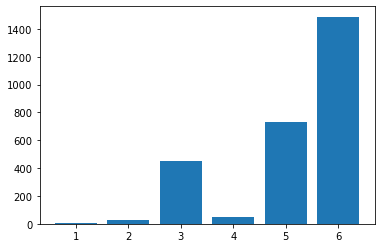

In [429]:
plt.bar([1,2,3,4,5,6],[len(group[1]),len(group[2]),len(group[3]),len(group[4]),len(group[5]),len(group[6])])


## making an optimal? hash function

In [11]:
def hash_func(state):
    string = ''
    temp = np.round(canonical_phase(state),8)
    for coeff in temp:
        if np.real(coeff) == 0 :
            string += '[0.]'
        else:
            string +=   str(np.real(coeff))
        if np.imag(coeff) == 0:
            string += '[0.]'
        else:
            string += str(np.imag(coeff))
        
    return string

def canonical_phase(state):
    #phase choosen so that the first nonzero element is positive
    for coeff in state:
        if not math.isclose(np.abs(coeff),0):
            phase = np.angle(coeff)
            break
    return state / np.exp(1j*phase)

In [13]:
import copy
import time
start_time = time.perf_counter()

group = {hash_func(zero):zero}
new_elems = group
total = 1
depth = 0 # Tracks the number of times we have been through the loop
while(depth<5):
    
    num_added = 0 
    current_group = new_elems.copy()
    new_elems = {}
    for g in generators:
        # iterate through the group
        for key in current_group: 
            state = g@current_group[key]
            hashed = hash_func(state)
            if not (hashed in group):
                new_elems.update({hashed:state}) 
                group.update({hashed:state})
                num_added += 1
    if num_added == 0: 
        break
    total += num_added  
    depth +=1
    print('There are',num_added, 'depth',depth, 'boards and', total, 'total boards up to depth', depth)
    
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")   

There are 4 depth 1 boards and 5 total boards up to depth 1
There are 22 depth 2 boards and 27 total boards up to depth 2
There are 100 depth 3 boards and 127 total boards up to depth 3
There are 495 depth 4 boards and 622 total boards up to depth 4
There are 2120 depth 5 boards and 2742 total boards up to depth 5
The execution time is: 2.449834524000835


In [1]:
len(group)

NameError: name 'group' is not defined

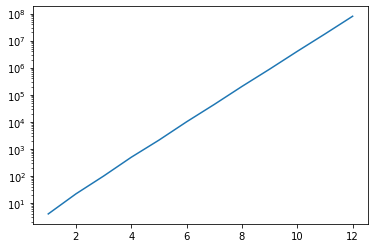

In [16]:
x = range(1,13)
y = [4,22,100,495,2120,10076,44122,203547,885667,4028019,17626528,79485244]
plt.semilogy(x,y)
fit = np.polyfit(x,np.log(y),1)

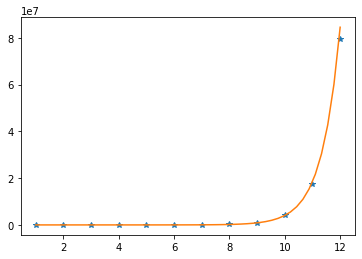

In [32]:
z = np.linspace(1,12)
fitted = np.exp(fit[1])*np.exp(fit[0]*z)
plt.plot(x,y,'*')
plt.plot(z,fitted)

In [28]:
np.exp(fit[1])*np.exp(fit[0]*16)

36572194062.6913

In [73]:
a = {hash_func(zero):zero}
state = zero
num_added = 0
for i in range(100000):
    state = SQRT_SWAP[i%3]@state
    hashed = hash_func(state)
    if not (hashed in a):
        a.update({hashed:state})
        num_added += 1
print(num_added)



99998


In [71]:
close_states = 0 
i = 0

for key in a:
    i += 1
    j = 0
    for key_2 in a:
        j += 1
        if i != j:
            if test_close_states_swift(a[key],a[key_2]):
                close_states += 1 
print(close_states)

0


In [83]:
zero_vals = []
states = []
for key in a:
    zero_vals.append(a[key][0])
    states.append(a[key])

array([[ 0.98814936+0.06659038j],
       [-0.01185064+0.06659038j],
       [-0.04401747-0.03329519j],
       [-0.04401747-0.03329519j],
       [-0.05586811+0.03329519j],
       [-0.05586811+0.03329519j]])

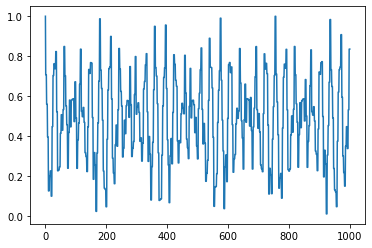

In [122]:
plt.plot(np.abs(zero_vals[0:1000]))
states[574]

In [120]:
M = np.linalg.matrix_power((SQRT_SWAP[2]@SQRT_SWAP[1]@SQRT_SWAP[0]),8)

M

array([[-0.40625-0.1875j ,  0.09375+0.3125j ,  0.375  -0.03125j,
         0.375  -0.03125j, -0.53125+0.28125j, -0.03125-0.21875j],
       [ 0.09375+0.3125j , -0.40625-0.1875j ,  0.375  -0.03125j,
         0.375  -0.03125j, -0.03125-0.21875j, -0.53125+0.28125j],
       [ 0.28125-0.03125j,  0.28125-0.03125j,  0.34375-0.03125j,
        -0.65625-0.03125j, -0.375  -0.0625j , -0.375  -0.0625j ],
       [ 0.28125-0.03125j,  0.28125-0.03125j, -0.65625-0.03125j,
         0.34375-0.03125j, -0.375  -0.0625j , -0.375  -0.0625j ],
       [-0.125  +0.28125j, -0.625  -0.21875j, -0.28125-0.0625j ,
        -0.28125-0.0625j , -0.40625+0.21875j,  0.09375-0.28125j],
       [-0.625  -0.21875j, -0.125  +0.28125j, -0.28125-0.0625j ,
        -0.28125-0.0625j ,  0.09375-0.28125j, -0.40625+0.21875j]])